### Packages loaded

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [51]:
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

In [3]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

### Brief description of the data

In [4]:
data = pd.read_csv('C:/Users/woote/Desktop/Python/IBM Machine Learning/Hotel Reservations.csv')

In [5]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
data.shape

(36275, 19)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
data.select_dtypes(include='object').describe().T

,count,unique,top,freq
Booking_ID,36275,36275,INN04203,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


In [9]:
data.select_dtypes(include=['int64','float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


### EDA

In [10]:
print(data.shape)
print(data.drop_duplicates().shape)

(36275, 19)
(36275, 19)


In [11]:
data.isnull().any()

Booking_ID                              False
no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

In [12]:
data = data.drop('Booking_ID', axis = 1)
data.shape

(36275, 18)

Variable: no_of_adults


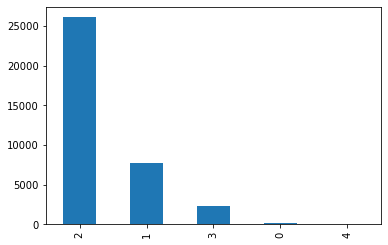

Variable: no_of_children


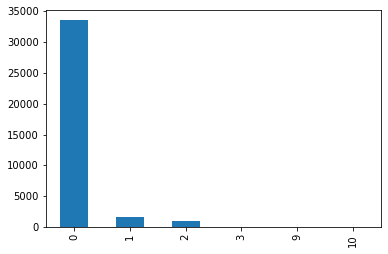

Variable: no_of_weekend_nights


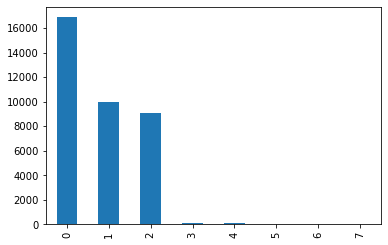

Variable: no_of_week_nights


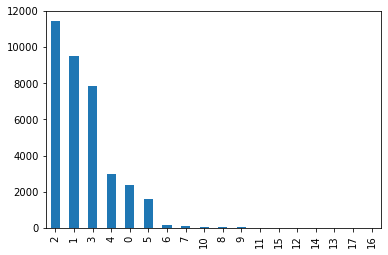

Variable: type_of_meal_plan


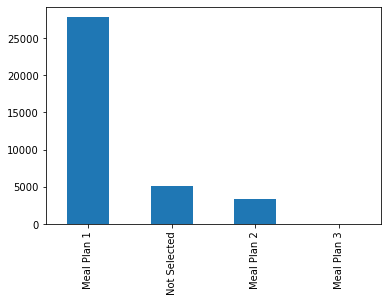

Variable: required_car_parking_space


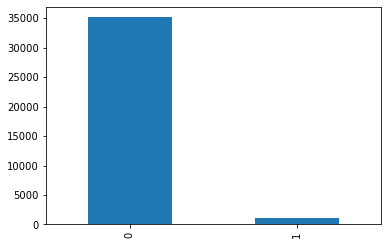

Variable: room_type_reserved


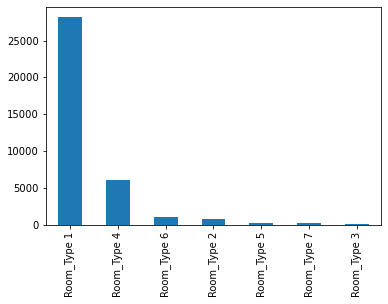

Variable: lead_time


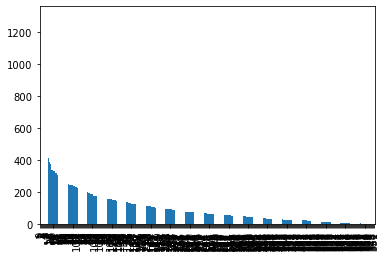

Variable: arrival_year


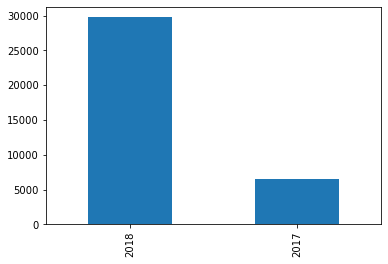

Variable: arrival_month


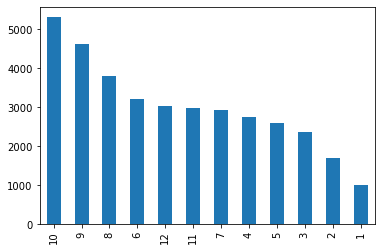

Variable: arrival_date


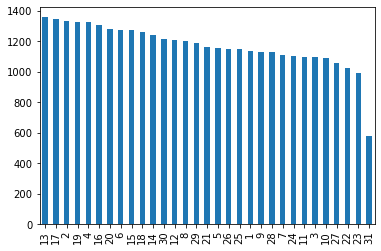

Variable: market_segment_type


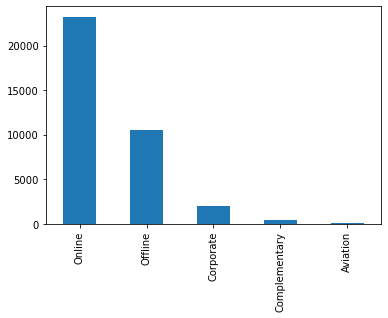

Variable: repeated_guest


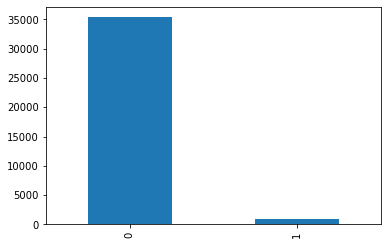

Variable: no_of_previous_cancellations


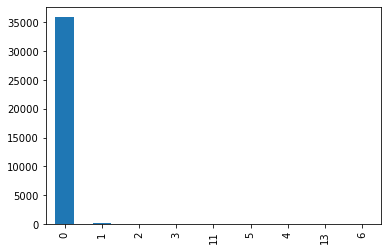

Variable: no_of_previous_bookings_not_canceled


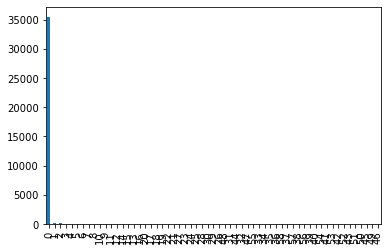

Variable: avg_price_per_room


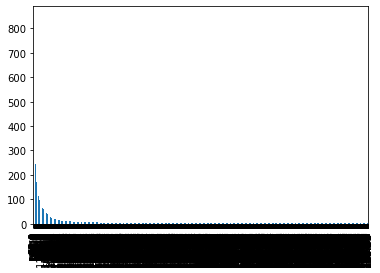

Variable: no_of_special_requests


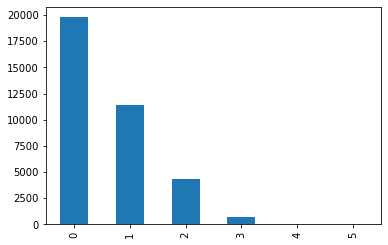

Variable: booking_status


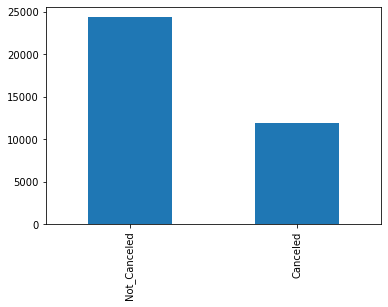

In [13]:
for col in data.columns.values.tolist():
    print('Variable:',col)
    data[col].value_counts().plot(kind='bar')
    plt.show()

In [14]:
data['season'] = [month%12//3 + 1 for month in data['arrival_month']]
data['season'] = data['season'].replace([1,2,3,4],['spring','summer','autumn','winter'])

In [15]:
data.columns.values

array(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status', 'season'], dtype=object)

In [16]:
data = data.drop(['required_car_parking_space','arrival_year','arrival_month','arrival_date',
           'repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled'],axis = 1)

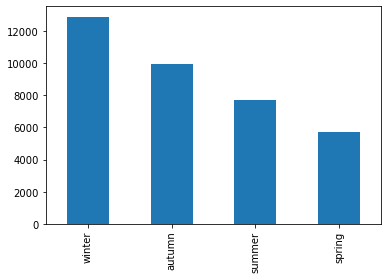

In [17]:
data['season'].value_counts().plot(kind='bar');

In [18]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,market_segment_type,avg_price_per_room,no_of_special_requests,booking_status,season
0,2,0,1,2,Meal Plan 1,Room_Type 1,224,Offline,65.00,0,Not_Canceled,winter
1,2,0,2,3,Not Selected,Room_Type 1,5,Online,106.68,1,Not_Canceled,winter
2,1,0,2,1,Meal Plan 1,Room_Type 1,1,Online,60.00,0,Canceled,spring
3,2,0,0,2,Meal Plan 1,Room_Type 1,211,Online,100.00,0,Canceled,summer
4,2,0,1,1,Not Selected,Room_Type 1,48,Online,94.50,0,Canceled,summer


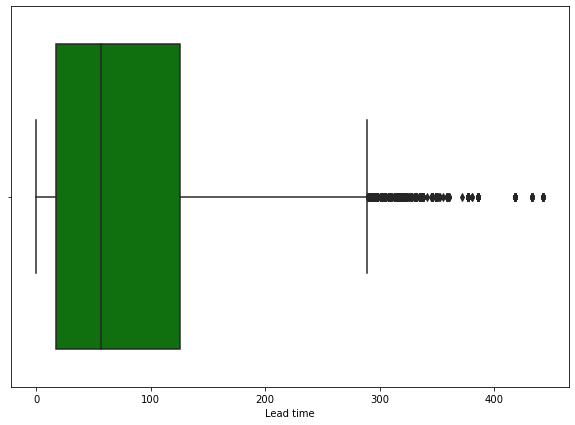

In [19]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(data = data, x = 'lead_time', color = "green")
ax.set(xlabel='Lead time');

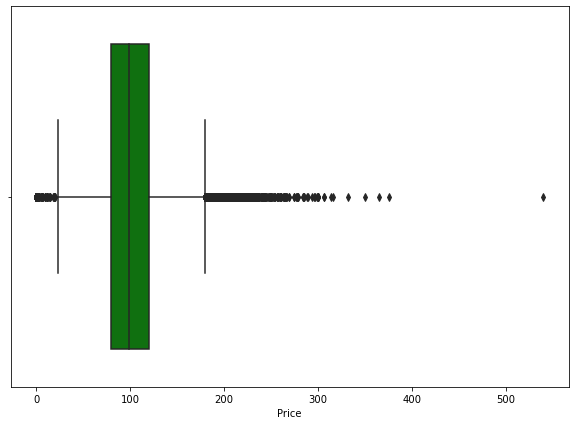

In [20]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(data = data, x = 'avg_price_per_room', color = "green")
ax.set(xlabel='Price');

### Model 1 Logistic Regression

In [21]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,market_segment_type,avg_price_per_room,no_of_special_requests,booking_status,season
0,2,0,1,2,Meal Plan 1,Room_Type 1,224,Offline,65.00,0,Not_Canceled,winter
1,2,0,2,3,Not Selected,Room_Type 1,5,Online,106.68,1,Not_Canceled,winter
2,1,0,2,1,Meal Plan 1,Room_Type 1,1,Online,60.00,0,Canceled,spring
3,2,0,0,2,Meal Plan 1,Room_Type 1,211,Online,100.00,0,Canceled,summer
4,2,0,1,1,Not Selected,Room_Type 1,48,Online,94.50,0,Canceled,summer


In [22]:
data.dtypes

no_of_adults                int64
no_of_children              int64
no_of_weekend_nights        int64
no_of_week_nights           int64
type_of_meal_plan          object
room_type_reserved         object
lead_time                   int64
market_segment_type        object
avg_price_per_room        float64
no_of_special_requests      int64
booking_status             object
season                     object
dtype: object

#### Recoding target to binary

In [23]:
le = LabelEncoder()
data['booking_status'] = le.fit_transform(data.booking_status)
data['booking_status'].sample(5)

4402     0
10961    1
27313    0
33746    0
3267     1
Name: booking_status, dtype: int32

In [24]:
y_init = data['booking_status']
X = data.drop(labels = 'booking_status', axis = 1)

#### Standardization

In [25]:
ss = StandardScaler()
cols_to_scale = X.select_dtypes(include = ['int64','float64']).columns.values.tolist()
ss.fit(data[cols_to_scale])
X_raw = X.copy()
#scale selected data
X_raw[cols_to_scale] = ss.transform(data[cols_to_scale])

In [26]:
print(X_raw.shape)
X_init = pd.get_dummies(X_raw, prefix=None, prefix_sep='_', drop_first=True)
print(X_init.shape)

(36275, 11)
(36275, 23)


In [27]:
X_init.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,season_spring,season_summer,season_winter
0,0.298893,-0.26147,0.217401,-0.144803,1.614896,-1.095033,-0.78814,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.298893,-0.26147,1.365993,0.563972,-0.933701,0.092806,0.48376,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,-1.628975,-0.26147,1.365993,-0.853578,-0.980250,-1.237528,-0.78814,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0.298893,-0.26147,-0.931190,-0.144803,1.463610,-0.097567,-0.78814,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0.298893,-0.26147,0.217401,-0.853578,-0.433291,-0.254312,-0.78814,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [28]:
y_init.head() # 1- Not Cancelled 0 - Cancelled

0    1
1    1
2    0
3    0
4    0
Name: booking_status, dtype: int32

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_init, y_init, test_size=0.3)
print("X Training shape:",X_train.shape)
print("X Testing shape:",X_test.shape)
print("Y Training shape:",y_train.shape)
print("Y Testing shape:",y_test.shape)

X Training shape: (25392, 23)
X Testing shape: (10883, 23)
Y Training shape: (25392,)
Y Testing shape: (10883,)


#### Grid Search CV

In [30]:
param_grid = {
    "penalty": ['l1','l2'],
    "solver": ['lbfgs','saga','liblinear'],
    "C": np.logspace(-3,3,7),
}

lr = LogisticRegression()

lr_cv = GridSearchCV(lr, param_grid, n_jobs=2,scoring='accuracy', cv = 10)

In [31]:
lr_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=2,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'saga', 'liblinear']},
             scoring='accuracy')

In [32]:
print("Tuned Hyperparameters :", lr_cv.best_params_)
print("Accuracy :",lr_cv.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.8000155371480495


In [33]:
pred = lr_cv.predict(X_test)

In [34]:
evaluate_metrics(y_test, pred)

{'accuracy': 0.8018928604245154,
 'recall': array([0.62734135, 0.88735286]),
 'precision': array([0.7316596 , 0.82945241]),
 'f1score': array([0.67549669, 0.85742627])}

In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68      3577
           1       0.83      0.89      0.86      7306

    accuracy                           0.80     10883
   macro avg       0.78      0.76      0.77     10883
weighted avg       0.80      0.80      0.80     10883



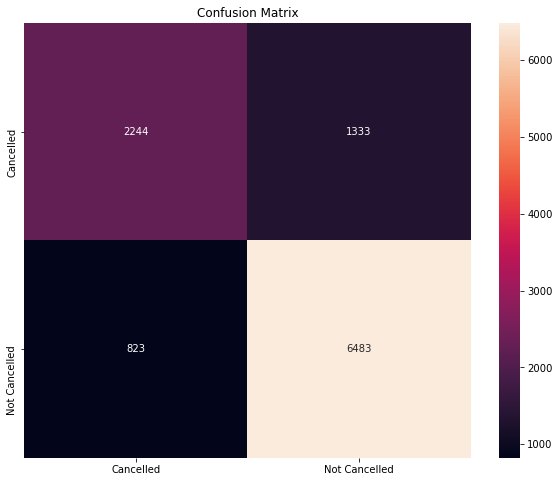

In [36]:
cf = confusion_matrix(y_test, pred) #Bottom predictions, left - real
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cf, annot=True, fmt="d", xticklabels=['Cancelled','Not Cancelled'], yticklabels= ['Cancelled','Not Cancelled'])
ax.set(title="Confusion Matrix");

### Model 2 KNN

#### Examining data - IMPORTANT (must be scaled)

In [41]:
round(X_init.describe().T, 2) #Binary classes min=0,max=1; other were a subject of standardization - mean = 0, sd = 1

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,-0.00,1.00,-3.56,0.30,0.30,0.30,4.15
no_of_children,36275.0,0.00,1.00,-0.26,-0.26,-0.26,-0.26,24.57
no_of_weekend_nights,36275.0,0.00,1.00,-0.93,-0.93,0.22,1.37,7.11
no_of_week_nights,36275.0,-0.00,1.00,-1.56,-0.85,-0.14,0.56,10.49
lead_time,36275.0,-0.00,1.00,-0.99,-0.79,-0.33,0.47,4.16
avg_price_per_room,36275.0,-0.00,1.00,-2.95,-0.66,-0.11,0.47,12.44
no_of_special_requests,36275.0,0.00,1.00,-0.79,-0.79,-0.79,0.48,5.57
type_of_meal_plan_Meal Plan 2,36275.0,0.09,0.29,0.00,0.00,0.00,0.00,1.00
type_of_meal_plan_Meal Plan 3,36275.0,0.00,0.01,0.00,0.00,0.00,0.00,1.00
type_of_meal_plan_Not Selected,36275.0,0.14,0.35,0.00,0.00,0.00,0.00,1.00


In [42]:
round(y_init.describe().T, 2)

count    36275.00
mean         0.67
std          0.47
min          0.00
25%          0.00
50%          1.00
75%          1.00
max          1.00
Name: booking_status, dtype: float64

In [44]:
param_grid = {
    "n_neighbors": [3,5,7,9,11,13,15,17,19],
    "weights": ['uniform', 'distance']
}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, n_jobs=2,scoring='accuracy', cv = 10)

In [45]:
knn_cv.fit(X_train,y_train)
print("Tuned Hyperparameters :", knn_cv.best_params_)
print("Accuracy :",knn_cv.best_score_)

Tuned Hyperparameters : {'n_neighbors': 19, 'weights': 'distance'}
Accuracy : 0.8664537777598597


In [46]:
pred = knn_cv.predict(X_test)

In [47]:
evaluate_metrics(y_test, pred)

{'accuracy': 0.8712671138472847,
 'recall': array([0.78669276, 0.91267451]),
 'precision': array([0.81517961, 0.89732203]),
 'f1score': array([0.80068289, 0.90493316])}

In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      3577
           1       0.90      0.91      0.90      7306

    accuracy                           0.87     10883
   macro avg       0.86      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883



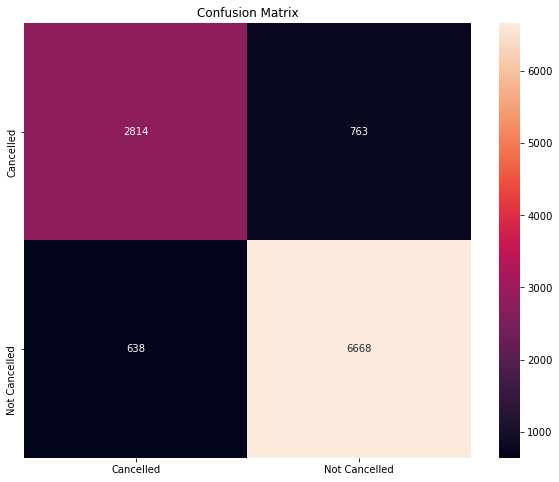

In [50]:
cf = confusion_matrix(y_test, pred) #Bottom predictions, left - real
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cf, annot=True, fmt="d", xticklabels=['Cancelled','Not Cancelled'], yticklabels= ['Cancelled','Not Cancelled'])
ax.set(title="Confusion Matrix");

### Model 3 Random Forest

#### Examining source; no pre-processing needed, operate on non-scaled data and original categorical features

In [52]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,market_segment_type,avg_price_per_room,no_of_special_requests,season
0,2,0,1,2,Meal Plan 1,Room_Type 1,224,Offline,65.00,0,winter
1,2,0,2,3,Not Selected,Room_Type 1,5,Online,106.68,1,winter
2,1,0,2,1,Meal Plan 1,Room_Type 1,1,Online,60.00,0,spring
3,2,0,0,2,Meal Plan 1,Room_Type 1,211,Online,100.00,0,summer
4,2,0,1,1,Not Selected,Room_Type 1,48,Online,94.50,0,summer


In [69]:
#Coding to numbers
le_meal = LabelEncoder()
le_meal.fit(['Meal Plan 1','Meal Plan 2','Meal Plan 3','Not Selected'])
X.loc[:,'type_of_meal_plan'] = le_meal.transform(X.loc[:,'type_of_meal_plan']) 

le_room = LabelEncoder()
le_room.fit(['Room_Type 1','Room_Type 2','Room_Type 3','Room_Type 4','Room_Type 5','Room_Type 6','Room_Type 7'])
X.loc[:,'room_type_reserved'] = le_room.transform(X.loc[:,'room_type_reserved']) 

le_market = LabelEncoder()
le_market.fit(['Online','Offline','Corporate','Complementary','Aviation'])
X.loc[:,'market_segment_type'] = le_market.transform(X.loc[:,'market_segment_type'])

le_season = LabelEncoder()
le_season.fit(['spring','summer','autumn','winter'])
X.loc[:,'season'] = le_season.transform(X.loc[:,'season'])

In [70]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,market_segment_type,avg_price_per_room,no_of_special_requests,season
0,2,0,1,2,0,0,224,3,65.00,0,3
1,2,0,2,3,3,0,5,4,106.68,1,3
2,1,0,2,1,0,0,1,4,60.00,0,1
3,2,0,0,2,0,0,211,4,100.00,0,2
4,2,0,1,1,3,0,48,4,94.50,0,2


In [71]:
y_init.head()

0    1
1    1
2    0
3    0
4    0
Name: booking_status, dtype: int32

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y_init, test_size=0.3)
print("X Training shape:",X_train.shape)
print("X Testing shape:",X_test.shape)
print("Y Training shape:",y_train.shape)
print("Y Testing shape:",y_test.shape)

X Training shape: (25392, 11)
X Testing shape: (10883, 11)
Y Training shape: (25392,)
Y Testing shape: (10883,)


In [73]:
rf = RandomForestClassifier()
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [74]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}

rf_cv = GridSearchCV(rf, param_grid, n_jobs=2,scoring='accuracy', cv = 10)

In [75]:
rf_cv.fit(X_train,y_train)
print("Tuned Hyperparameters :", rf_cv.best_params_)
print("Accuracy :",rf_cv.best_score_)

Tuned Hyperparameters : {'max_depth': 17, 'max_features': 'log2', 'n_estimators': 39}
Accuracy : 0.8905170831097866


In [76]:
pred = rf_cv.predict(X_test)

In [77]:
evaluate_metrics(y_test, pred)

{'accuracy': 0.8928604245152991,
 'recall': array([0.79029071, 0.94237057]),
 'precision': array([0.86875582, 0.90300261]),
 'f1score': array([0.82766775, 0.92226667])}

In [78]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      3543
           1       0.90      0.94      0.92      7340

    accuracy                           0.89     10883
   macro avg       0.89      0.87      0.87     10883
weighted avg       0.89      0.89      0.89     10883



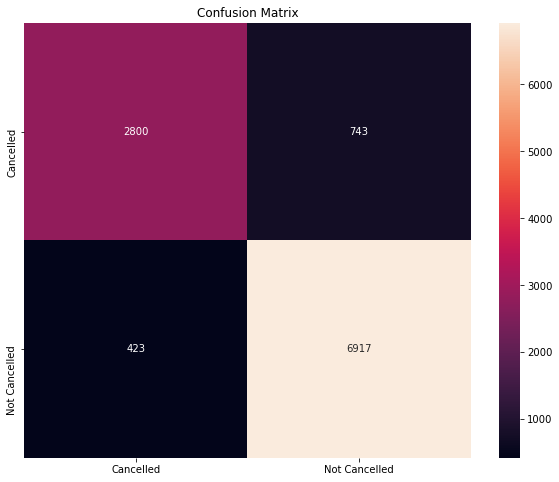

In [79]:
cf = confusion_matrix(y_test, pred) #Bottom predictions, left - real
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cf, annot=True, fmt="d", xticklabels=['Cancelled','Not Cancelled'], yticklabels= ['Cancelled','Not Cancelled'])
ax.set(title="Confusion Matrix");